# Notebook destinado a Parte 1 - Resolvendo um Problema Linearmente Separável do Projeto 2 de Redes Neurais 2020.1
## Colaboradores: Jakson Protázio e Nadine Brito

Primeiro importamos as bibliotecas necessárias.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Em seguida realizamos a leitura do dataset. 

In [2]:
dataset=np.fromfile('data/dataAll.txt')
linhas = len(dataset)//3
colunas=3
dataset=dataset.reshape(linhas, colunas)
print(dataset)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


No passo seguinte iremos iniciar o preenchimento do vetor de pesos.

In [3]:
pesos = np.array([random.uniform(-0.5,0.5),random.uniform(-0.5,0.5),random.uniform(-0.5,0.5)])
    
print(pesos)

[0.22935091 0.42423965 0.34662659]


Agora verificamos, através de uma soma ponderada e uma função de ativação, se os pesos precisam de ajuste. Para isso, primeiro, preenchemos um vetor com as entradas do dataset.

In [4]:
entradas = np.array([[-1, dataset[0,0], dataset[0,1]]])
for i in range(1, linhas):
    entradas = np.append(entradas, [[-1, dataset[i,0], dataset[i,1]]], axis=0)
print(entradas)

[[  -1.     -363.7884  244.1423]
 [  -1.      328.7572 -256.7658]
 [  -1.     -164.9827  613.2164]
 ...
 [  -1.      872.4311  669.1192]
 [  -1.      822.6894 -702.6489]
 [  -1.     -140.147   734.0983]]


Agora definimos a função que irá realizar a soma ponderada.

In [5]:
def soma(entradas,pesos):
    return(np.dot(entradas,pesos))

Em seguida definimos a função de ativação. Nesse cenário, a pedido do enunciado, adotou-se a função de ativação degrau com limiar sendo 0.

In [6]:
def ativacao(saida):
    if(saida >= 0):
        return 1
    else:
        return 0  

Definimos também a função de ajuste de pesos.

In [7]:
def ajusta(pesos_atuais, yd, y, x):
    taxa = 0.1
    erro = (yd-y)
    mult = taxa*erro
    result = pesos_atuais + np.dot(mult,x)
    return result


A função verifica, será responsável por fazer a chamada das funções para realizar a soma ponderada, função de ativação e a função de ajuste de pesos.

In [8]:
def verifica(pesos):
    qtde_ajuste = 0
    n = len(entradas)
    
    for i in range(n):
        soma_saida = soma(entradas[i], pesos)
        y = ativacao(soma_saida)
        if(y != dataset[i,2]):
            pesos = ajusta(pesos,dataset[i,2],y,entradas[i])
            qtde_ajuste += 1
            print("Pesos ajustados")
            print(pesos)
    
    return pesos,qtde_ajuste

Para dar início ao aprendizado colocamos a chamada da função verifica() em loop, onde a condição de parada é a convergência, ou seja, quando não há mais erros para os exemplos no conjunto de treinamento.

In [9]:
ajustes = np.array([])

parar = False
epocas = 0

while(parar==False):
    resultado = verifica(pesos)
    pesos = resultado[0]
    ajustes = np.append(ajustes,[resultado[1]])
    indice = len(ajustes)
    if(ajustes[indice-1] == 0):
        parar = True
    epocas += 1

Pesos ajustados
[  0.32935091  16.92250965 -60.97501341]
Pesos ajustados
[  0.22935091  89.71852965 -25.14545341]
Pesos ajustados
[   0.32935091    6.18891965 -124.27128341]
Pesos ajustados
[   0.42935091   55.37577965 -107.64255341]
Pesos ajustados
[  0.32935091 137.97447965 -27.78672341]
Pesos ajustados
[   0.42935091   97.96556965 -105.67941341]
Pesos ajustados
[  0.52935091 147.42638965 -56.78536341]
Pesos ajustados
[   0.62935091  107.87713965 -153.87940341]
Pesos ajustados
[  0.72935091 200.11911965 -67.40683341]
Pesos ajustados
[  0.82935091 188.22200965 -95.30637341]
Pesos ajustados
[   0.92935091  160.01454965 -128.89049341]
Pesos ajustados
[   0.82935091   95.72533965 -196.95512341]
Pesos ajustados
[   0.72935091  148.82965965 -161.17572341]
Pesos ajustados
[   0.82935091  213.82081965 -100.28404341]
Pesos ajustados
[   0.72935091  162.88723965 -163.68401341]
Pesos ajustados
[  0.62935091 245.77910965 -80.90252341]
Pesos ajustados
[   0.52935091  199.63172965 -137.55190341]
P

In [10]:
ajustes = ajustes.astype(int)
total_ajustes = np.sum(ajustes)

print('Ao final da execução do algoritmo, podemos verificar que houve um total de ',total_ajustes,' ajuste(s) realizados nos pesos. Para a convergência foram necessárias um total de ',epocas,' épocas. Abaixo pode-se visualizar a quantidade de ajustes realizados em cada época.')
print('')

for i in range(0,len(ajustes)):
    print('Época ',i+1,' => ', ajustes[i],' ajustes')

Ao final da execução do algoritmo, podemos verificar que houve um total de  204  ajuste(s) realizados nos pesos. Para a convergência foram necessárias um total de  21  épocas. Abaixo pode-se visualizar a quantidade de ajustes realizados em cada época.

Época  1  =>  34  ajustes
Época  2  =>  29  ajustes
Época  3  =>  14  ajustes
Época  4  =>  17  ajustes
Época  5  =>  15  ajustes
Época  6  =>  3  ajustes
Época  7  =>  3  ajustes
Época  8  =>  18  ajustes
Época  9  =>  6  ajustes
Época  10  =>  18  ajustes
Época  11  =>  3  ajustes
Época  12  =>  3  ajustes
Época  13  =>  3  ajustes
Época  14  =>  3  ajustes
Época  15  =>  3  ajustes
Época  16  =>  3  ajustes
Época  17  =>  3  ajustes
Época  18  =>  5  ajustes
Época  19  =>  6  ajustes
Época  20  =>  15  ajustes
Época  21  =>  0  ajustes


Sendo assim foi gerado o gráfico contendo todos os exemplos do conjunto de dados bem como a reta que separa as classses. 

<function matplotlib.pyplot.show(close=None, block=None)>

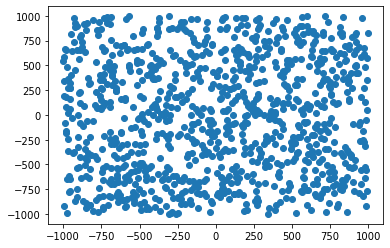

In [11]:
x = []
y = []

for i in range (len(dataset)):
    x.append(dataset[i][0])
    y.append(dataset[i][1])

plt.scatter(x,y)
plt.show

#plt.plot(x, y) -> reta